# Logistic Regression
### Definisi Logistic Regression
Logistic Regression adalah model regresi yang menggunakan fungsi logistic. Model ini digunakan untuk memprediksi probabilitas dari kelas tertentu. Setiap probabilitas akan bernilai antara 0 dan 1 dengan total probabilitas yang bernilai 1.

### Mengimpor Library yang Digunakan


In [86]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Memuat Dataset
Pada percobaan kali ini menggunakan dataset kanker payudara yang bersumber dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29) dan dapat diimpor melalui library sklearn.

In [87]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
print(f"Banyaknya sampel data: {n_samples} dan banyaknya fitur: {n_features}")

Banyaknya sampel data: 569 dan banyaknya fitur: 30


### Mencoba mencetak tabel dengan pandas
Dengan menggunakan library pandas, kita dapat mencetak tabel yang berisi data dan target. Sebagai contoh, akan dicetak sebagian data, dengan 30 fitur (kolom) dan 10 sampel (baris)

In [88]:

import pandas as pd
df = pd.DataFrame(X, columns=bc.feature_names)
df['target'] = y
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


### Training dan Testing Split
Percobaan ini akan menggunakan 80% data dari dataset untuk keperluan training dan 20% data untuk keperluan testing. Untuk memisahkan data, digunakan fungsi ```train_test_split``` yang dapat diimpor dari library ```sklearn.model_selection```.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Banyaknya sampel untuk training: {X_train.shape[0]} dan banyaknya sampel untuk testing: {X_test.shape[0]}")

Banyaknya sampel untuk training: 455 dan banyaknya sampel untuk testing: 114


### Mencoba untuk memplot data training dan testing menggunakan fitur pertama dan kedua

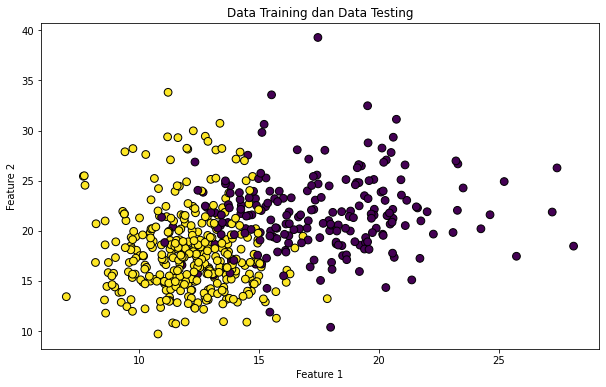

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=60, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=60, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Training dan Data Testing")
plt.show()

### Melakukan Transformasi Data

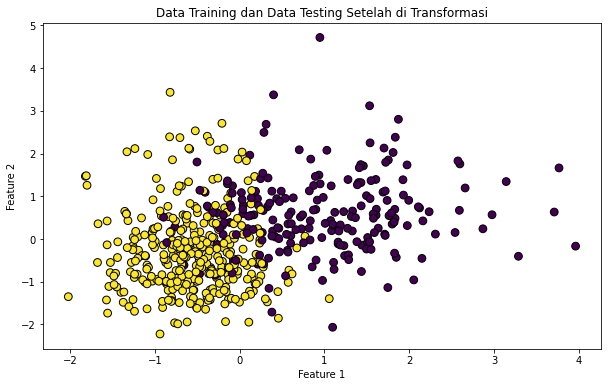

In [91]:
# membuat scaler untuk data training
scaler = StandardScaler()
# mentransformasikan data training dan testing
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#plot data training dan testing
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=60, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=60, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Training dan Data Testing Setelah di Transformasi")
plt.show()

Dapat kita amati bahwa hasil plot data training dan testing setelah dilakukan scaler akan berubah. Proses ini disebut standarisasi data (data standardization), yaitu proses normalisasi data sehingga data memiliki mean=0 dan variance=1.

- ```fit_transform``` digunakan untuk training data. Metode fit mengkalkulasi mean dan variance dari setiap fitur data. Transformasi ini mentransformasikan setiap fitur menggunakan mean dan variance yang telah dikalkulasi.
- ```transform``` digunakan untuk data testing. Perbedaannya, transform menggunakan nilai mean dan variance yang telah dikalkulasi dari training data untuk ditransformasikan terhadap data testing.

**Mengapa kita perlu melakukan ini?**
Jika kita menggunakan metode ```fit_transform``` pada data testing, kita akan menghitung ulang mean dan varians. Ini adalah prosedur standar untuk menskalakan data pada saat membangun model pembelajaran mesin.


### Persiapan Data Sebelum Training

In [92]:
# mengkonversi data training dan testing ke tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# melakukan reshape terhadap y_test dan y_train
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

### Membangun Model
Model yang digunakan adalah logistic regression dengan menggunakan library ```torch.nn```. Sementara untuk fungsi aktivasi, kita menggunakan fungsi ```Sigmoid```. Fungsi sigmoid akan menghasilkan nilai keluaran 0 atau 1 berdasarkan dari nilai yang dihasilkan oleh fungsi.

In [93]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size=1):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted


model = LogisticRegression(n_features)

### Fungsi Loss dan Optimizer
Fungsi loss yang digunakan adalah [Binary Cross Enthropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html). Sementara itu, optimizer yang digunakan adalah [Stochastic Gradient Descent](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD).

In [94]:
learning_rate = 0.01
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training

In [95]:
# training loop
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass
    y_predicted = model(X_train)
    # backward pass
    loss = loss_function(y_predicted, y_train)
    loss.backward()
    # perbarui weight
    optimizer.step()
    # reset optimizer jadi 0
    optimizer.zero_grad()

    # menampilkan loss setiap epoch
    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")

Epoch: 10, Loss: 0.4935
Epoch: 20, Loss: 0.4256
Epoch: 30, Loss: 0.3799
Epoch: 40, Loss: 0.3468
Epoch: 50, Loss: 0.3215
Epoch: 60, Loss: 0.3014
Epoch: 70, Loss: 0.2849
Epoch: 80, Loss: 0.2711
Epoch: 90, Loss: 0.2593
Epoch: 100, Loss: 0.2491


### Mengevaluasi performa

In [96]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum().float() / y_test.shape[0]
    print(f"Akurasi: {acc.item():.4f}")

# perbandingkan antara y_test dan y_predicted_cls menggunakan pandas
df_test = pd.DataFrame(y_test.numpy(), columns=['y_test'])
df_test['y_predicted_cls'] = y_predicted_cls.numpy()
df_test['Kesesuaian'] = df_test['y_test'] == df_test['y_predicted_cls']
df_test

Akurasi: 0.9649


,y_test,y_predicted_cls,Kesesuaian
0,1.0,1.0,True
1,0.0,0.0,True
2,0.0,0.0,True
3,1.0,1.0,True
4,1.0,1.0,True
...,...,...,...
109,1.0,1.0,True
110,0.0,0.0,True
111,1.0,1.0,True
112,1.0,1.0,True


In [97]:
# cetak jumlah salah dan benar
print(f"Jumlah salah: {(df_test['Kesesuaian'] == False).sum()}")
print(f"Jumlah benar: {(df_test['Kesesuaian'] == True).sum()}")

Jumlah salah: 4
Jumlah benar: 110
